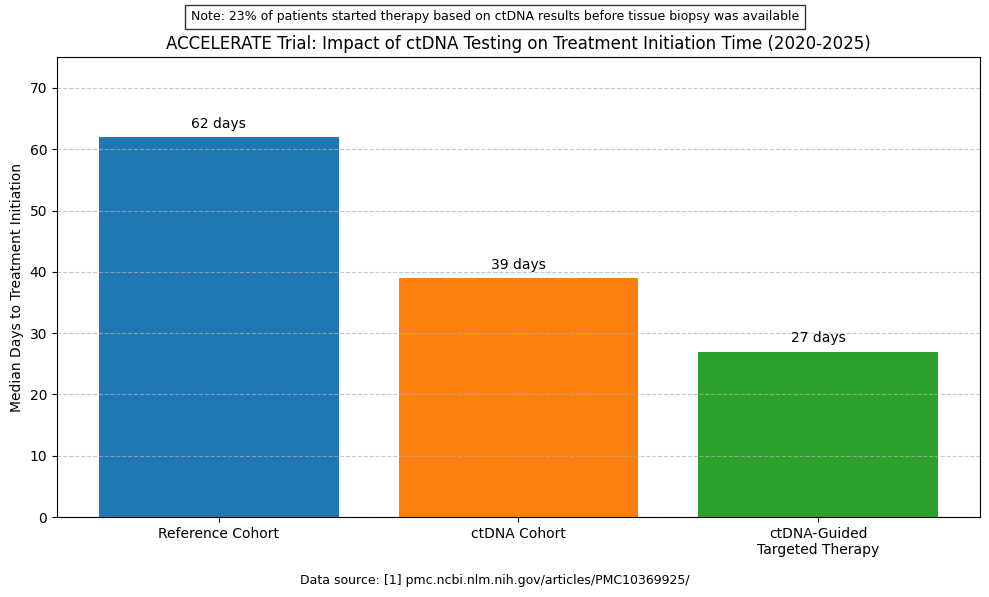

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from ACCELERATE trial on time to treatment for lung adenocarcinoma
categories = ['Reference Cohort', 'ctDNA Cohort', 'ctDNA-Guided\nTargeted Therapy']
times_to_treatment = [62, 39, 27]  # median days to treatment initiation

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
bars = ax.bar(categories, times_to_treatment, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height} days', ha='center', va='bottom')

# Add labels and title
ax.set_ylabel('Median Days to Treatment Initiation')
ax.set_title('ACCELERATE Trial: Impact of ctDNA Testing on Treatment Initiation Time (2020-2025)')
plt.ylim(0, 75)  # set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotation for data source
plt.figtext(0.5, 0.01,
            'Data source: [1] pmc.ncbi.nlm.nih.gov/articles/PMC10369925/',
            ha='center', fontsize=9)

# Add interpretation note
plt.figtext(0.5, 0.95,
            'Note: 23% of patients started therapy based on ctDNA results before tissue biopsy was available',
            ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

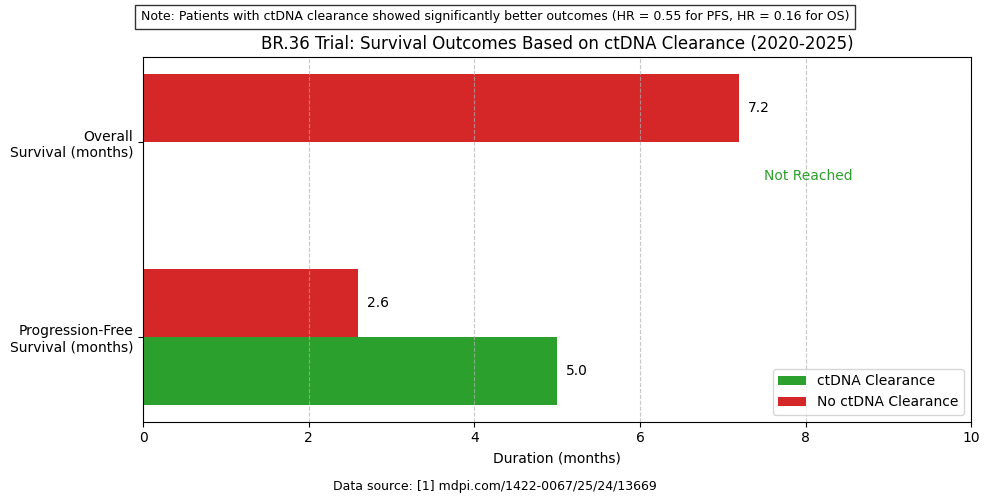

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data from BR.36 trial on survival outcomes based on ctDNA clearance
outcomes = ['Progression-Free\nSurvival (months)', 'Overall\nSurvival (months)']

# Values for ctDNA clearance vs. no clearance
clearance_values = [5.0, float('nan')]  # OS not reached for clearance group
no_clearance_values = [2.6, 7.2]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Define x positions for the groups
y_pos = np.arange(len(outcomes))
width = 0.35

# Create horizontal bars
bars1 = ax.barh(y_pos - width/2, clearance_values, width, label='ctDNA Clearance', color='#2ca02c')
bars2 = ax.barh(y_pos + width/2, no_clearance_values, width, label='No ctDNA Clearance', color='#d62728')

# Add values at end of bars
for i, bars in enumerate([bars1, bars2]):
    for bar in bars:
        width = bar.get_width()
        if not np.isnan(width):
            label = f'{width:.1f}' if width < 10 else f'{int(width)}'
            ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                    label, va='center')
        elif i == 0 and bar.get_y() > 0.5:  # This is the NR (not reached) bar
            ax.text(7.5, bar.get_y() + bar.get_height()/2,
                    'Not Reached', va='center', color='#2ca02c')

# Add labels and title
ax.set_yticks(y_pos)
ax.set_yticklabels(outcomes)
ax.set_xlabel('Duration (months)')
ax.set_title('BR.36 Trial: Survival Outcomes Based on ctDNA Clearance (2020-2025)')
ax.legend(loc='lower right')

# Set x-axis limit
ax.set_xlim(0, 10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add annotation for data source
plt.figtext(0.5, 0.01,
            'Data source: [1] mdpi.com/1422-0067/25/24/13669',
            ha='center', fontsize=9)

# Add interpretation note
plt.figtext(0.5, 0.95,
            'Note: Patients with ctDNA clearance showed significantly better outcomes (HR = 0.55 for PFS, HR = 0.16 for OS)',
            ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

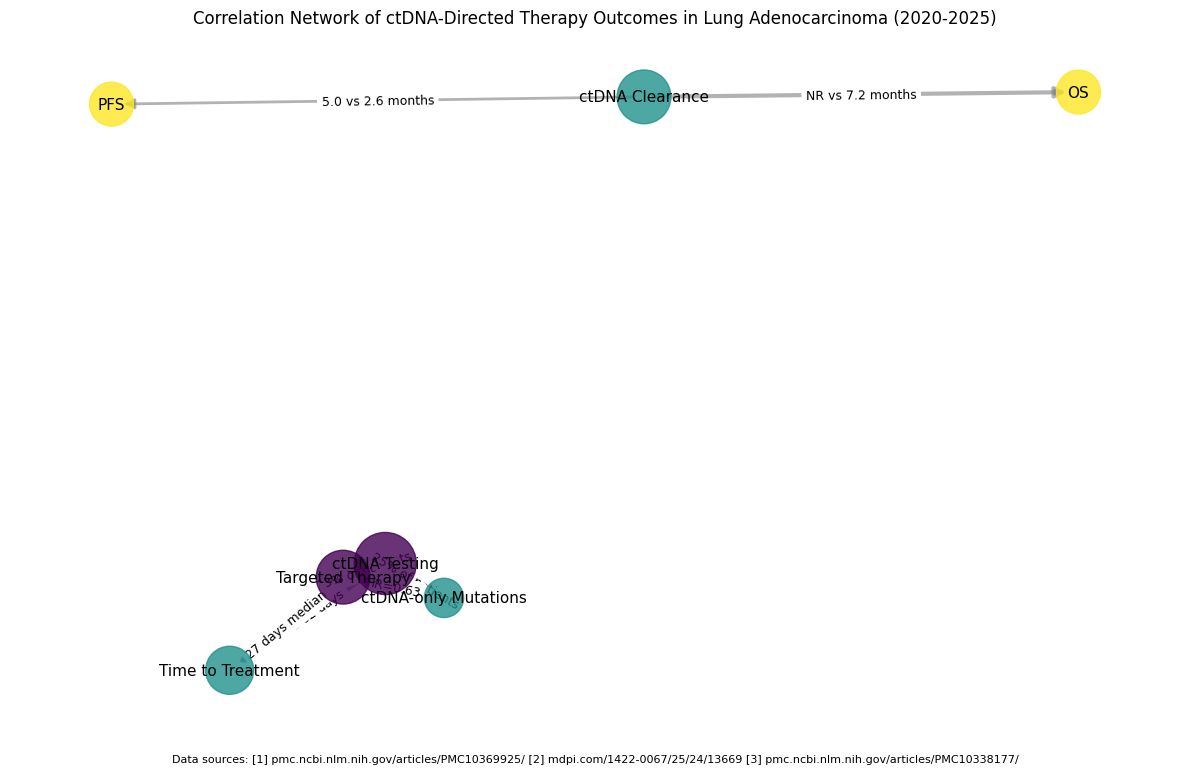

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create directed graph
G = nx.DiGraph()

# Add nodes for different clinical parameters
G.add_node("ctDNA Testing", size=2000, group=1)
G.add_node("Targeted Therapy", size=1500, group=1)
G.add_node("Time to Treatment", size=1200, group=2)
G.add_node("PFS", size=1000, group=3)  # Progression-Free Survival
G.add_node("OS", size=1000, group=3)   # Overall Survival
G.add_node("ctDNA Clearance", size=1500, group=2)
G.add_node("ctDNA-only Mutations", size=800, group=2)

# Add edges with weights based on report findings
G.add_edge("ctDNA Testing", "Time to Treatment", weight=3, relation="39 vs 62 days")
G.add_edge("ctDNA Testing", "Targeted Therapy", weight=2, relation="23% of patients")
G.add_edge("Targeted Therapy", "Time to Treatment", weight=2, relation="27 days median")
G.add_edge("ctDNA Clearance", "PFS", weight=2, relation="5.0 vs 2.6 months")
G.add_edge("ctDNA Clearance", "OS", weight=3, relation="NR vs 7.2 months")
G.add_edge("ctDNA Testing", "ctDNA-only Mutations", weight=2, relation="25% of patients")
G.add_edge("ctDNA-only Mutations", "Targeted Therapy", weight=2, relation="HR=0.63")

# Create figure
plt.figure(figsize=(12, 8))

# Define layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes with different sizes and colors based on group
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
node_colors = [G.nodes[node]['group'] for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors,
                       cmap=plt.cm.viridis, alpha=0.8)

# Draw edges with varying widths based on weight
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6,
                       edge_color='grey', arrows=True, arrowsize=15)

# Add labels to nodes
nx.draw_networkx_labels(G, pos, font_size=11, font_family='sans-serif')

# Add edge labels (quantitative findings)
edge_labels = {(u, v): G[u][v]['relation'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

# Set title and remove axes
plt.title('Correlation Network of ctDNA-Directed Therapy Outcomes in Lung Adenocarcinoma (2020-2025)')
plt.axis('off')

# Add citation information
plt.figtext(0.5, 0.01,
            'Data sources: [1] pmc.ncbi.nlm.nih.gov/articles/PMC10369925/ [2] mdpi.com/1422-0067/25/24/13669 [3] pmc.ncbi.nlm.nih.gov/articles/PMC10338177/',
            ha='center', fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()